# CA04 – Ensemble Models
## Eric Wu

## Import Basic Packages

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Read Data

In [2]:
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


## Building a Random Forest Model

In [0]:
census.drop('education_num_bin',axis=1,inplace=True)

In [0]:
# split the data to train and test
X_train = census.loc[census['flag']=='train',:'age_bin']
y_train = census.loc[census['flag']=='train','y']
# I reset the index so the index of test data could start from 0 instead of 32561 
X_test = census.loc[census['flag']=='test',:'age_bin'].reset_index(drop=True)
y_test = census.loc[census['flag']=='test','y'].reset_index(drop=True)

In [0]:
# Tranfrom the variables to dummies
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(handle_unknown='error', drop='first')  
X_train = onehotencoder.fit_transform(X_train).toarray() 
X_test = onehotencoder.transform(X_test).toarray()

In [0]:
from sklearn.ensemble import RandomForestClassifier
result = []
# a list of number that start from 50 and end with 500 with 10 intervals
n_est = np.linspace(50,500,10,dtype="int")
for n in n_est:
  rfc = RandomForestClassifier(n_estimators=n,random_state=101)
  rfc.fit(X_train,y_train)
  y_pred = rfc.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  result.append(accuracy)

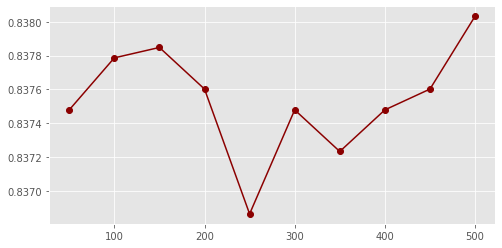

In [12]:
# it seems like n_est = 500 has the highest accuracy
plt.figure(figsize=(8,4))
plt.plot(n_est,result,'-o',c='darkred')

In [45]:
rfc = RandomForestClassifier(n_estimators=500,random_state=101)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rfc.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [47]:
rfacc = accuracy_score(y_test,y_pred)
print(rfacc)

0.8380320619126589


In [48]:
# the auc has also increased significantly compare to CA03's decision tree
y_score=rfc.predict_proba(X_test)[:,1]
rfauc = roc_auc_score(y_test,y_score)
print(rfauc)

0.8807638722919243


## Building AdaBoost, Gradient Boost (classifier) and XGB Model

### AdaBoostClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [0]:
result = []
n_est = np.linspace(50,500,10,dtype="int")
for n in n_est:
  ada = AdaBoostClassifier(n_estimators=n,random_state=101)
  ada.fit(X_train,y_train)
  y_pred = ada.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  result.append(accuracy)

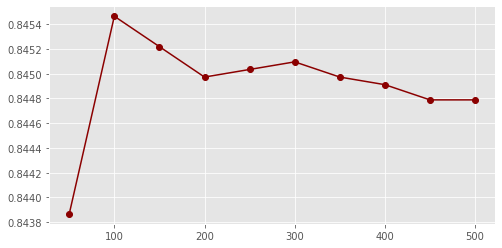

In [20]:
# the best n_est is 100
plt.figure(figsize=(8,4))
plt.plot(n_est,result,'-o',c='darkred')

In [0]:
ada = AdaBoostClassifier(n_estimators=100,random_state=101)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [50]:
adaacc = accuracy_score(y_test,y_pred)
print(adaacc)

0.8454640378355138


In [51]:
y_score=ada.predict_proba(X_test)[:,1]
adaauc = roc_auc_score(y_test,y_score)
print(adaauc)

0.8970858448330696


### GradientBoost Classifier

In [0]:
result = []
n_est = np.linspace(50,500,10,dtype="int")
for n in n_est:
  gb = GradientBoostingClassifier(n_estimators=n,random_state=101)
  gb.fit(X_train,y_train)
  y_pred = gb.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  result.append(accuracy)

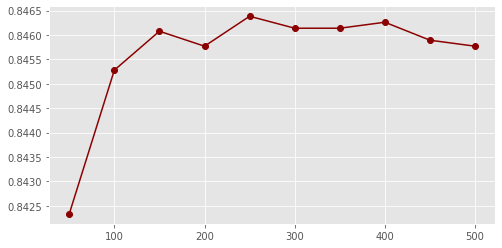

In [25]:
# the best n_est is 250
plt.figure(figsize=(8,4))
plt.plot(n_est,result,'-o',c='darkred')

In [0]:
gb = GradientBoostingClassifier(n_estimators=250,random_state=101)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [53]:
gbacc = accuracy_score(y_test,y_pred)
print(gbacc)

0.8463853571647934


In [0]:
y_score = gb.predict_proba(X_test)[:,1]

In [55]:
gbauc = roc_auc_score(y_test, y_pred)
print(gbauc)

0.7576490104236256


### XGB Classifier

In [0]:
# If you don't have xgboost, run the code below
# !pip install xgboost

In [0]:
import xgboost as xgb

In [0]:
result = []
n_est = np.linspace(50,500,10,dtype="int")
for n in n_est:
  xgbc = xgb.XGBClassifier(n_estimators=n,objective ='binary:logistic', learning_rate = 0.1, random_state=101)
  xgbc.fit(X_train,y_train)
  y_pred = xgbc.predict(X_test)
  accuracy = np.mean(y_test==y_pred)
  result.append(accuracy)

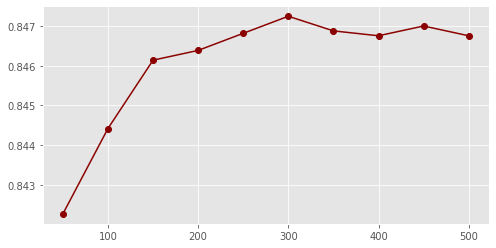

In [30]:
# the best n_est is 300
plt.figure(figsize=(8,4))
plt.plot(n_est,result,'-o',c='darkred')

In [0]:
# This is a binary classification question, so I use objective ='binary:logistic'
xgbc = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, random_state=101, n_estimators=300)

In [0]:
xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

In [58]:
xgbacc = accuracy_score(y_test,y_pred)
print(xgbacc)

0.8472452552054542


In [59]:
y_score = xgbc.predict_proba(X_test)[:,1]
xgbauc = roc_auc_score(y_test, y_score)
print(xgbauc)

0.8982081864697989


## Compare Performance

In [0]:
dist = {'RandomForest':{'Accuracy':rfacc,'AUC':rfauc, 'RandomState':101,'n_est':500},'AdaBoost':{'Accuracy':adaacc,'AUC':adaauc,'RandomState':101,'n_est':100},
        'GradientBoost':{'Accuracy':gbacc,'AUC':gbauc,'RandomState':101,'n_est':250},'Xgboost':{'Accuracy':xgbacc,'AUC':xgbauc,'RandomState':101,'n_est':300}}

In [61]:
comparedf = pd.DataFrame(dist)
comparedf

,RandomForest,AdaBoost,GradientBoost,Xgboost
Accuracy,0.838032,0.845464,0.846385,0.847245
AUC,0.880764,0.897086,0.757649,0.898208
RandomState,101.000000,101.000000,101.000000,101.000000
n_est,500.000000,100.000000,250.000000,300.000000


In [62]:
# because the column data type is float, so Randomstate and n_est would automatically transform to float
# below is the correct datatype for these two rows
comparedf.iloc[2:,].astype('int64')

,RandomForest,AdaBoost,GradientBoost,Xgboost
RandomState,101,101,101,101
n_est,500,100,250,300
